In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
x = [1.5, 1, 1.7, 0.7, 4, 3.9, 4.1, 4.3, 3.7, 3.7, 4.2, 4, 4.3, 0.8]
y = [1, 1.5, 1.2, 1.1, 9, 7.7, 8, 7.9, 7, 1, 0.4, 1.5, 1.8, 7.2]
index = list(range(1, 15, 1))
data = pd.DataFrame({'x': x, 'y': y}, index=index)

In [ ]:
data

,x,y
1,1.5,1.0
2,1.0,1.5
3,1.7,1.2
4,0.7,1.1
5,4.0,9.0
6,3.9,7.7
7,4.1,8.0
8,4.3,7.9
9,3.7,7.0
10,3.7,1.0


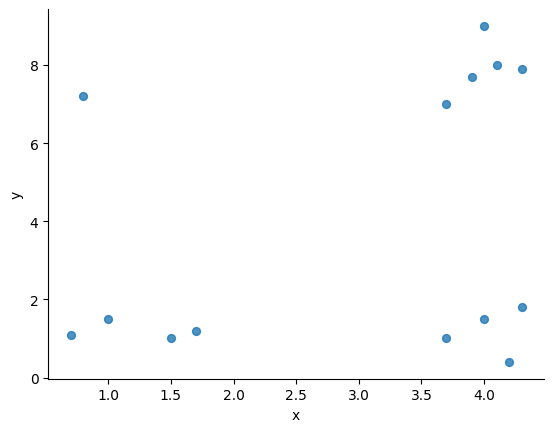

In [ ]:
data.plot(kind='scatter', x='x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def eucledian_distance(x, centers):
  dist = np.array([]).reshape(len(x), 0)
  for center in centers:
    # Compute the eucledian distance
    cal_dist = np.linalg.norm(x-center, axis=1).reshape(-1,1)
    dist = np.hstack([dist, cal_dist])
  return dist

def get_closest_center(x, centers):
  # Loop over each cluster centers and compute the distance from data point.
  dist = eucledian_distance(x, centers)
  # Get the index of the cluster centers with the smallest distance to the data point
  closest_center_index =  np.argmin(dist, axis = 1)
  return closest_center_index

def get_new_center(x, centers):
  closest_center = get_closest_center(x, centers)
  new_centers = np.zeros(centers.shape)
  # Loop over center and compute the new ones.
  for c in range(len(centers)):
    # Get all the data points belonging to a particular cluster
    cluster_data = x[closest_center == c]

    # Compute the average of cluster members to compute new center
    new_centers[c] = cluster_data.mean(axis = 0)
  return new_centers, closest_center

def kmeans(data, num_iters, initial_centers):
  color = ['red', 'blue', 'green']
  for i in range(num_iters):  # Assuming 10 iterations
    centers, labels = get_new_center(data.to_numpy(), initial_centers)
    # print(centers, labels)
    for j, center in enumerate(centers):
      print(f'Iteration {i+1:<5}: ', end='')
      print(f'Centroid of Cluster {j+1} ' + '(' + ', '.join(f'{num}' for num in np.round(initial_centers[j], 2)) + ')')
      print('                 ', end='')

      print(f'Data in Cluster {j+1} '+'('+ ', '.join(f'#{num+1}' for num in np.where(labels == j)[0]) + ')')

      # plot iteration results
      cluster_data = data.iloc[labels==j].to_numpy()
      plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker = '.', label = f'Cluster {j+1}', c=color[j])
      plt.scatter(*initial_centers[j], label = f'Center {j+1}', marker='*', s=100, c=color[j])
    plt.legend()
    plt.show()
    print()
    initial_centers = centers
  return centers, labels

k=2 and initial cluster centres at (0.8, 7.2) and (0.7, 1.1)

Iteration 1    : Centroid of Cluster 1 (0.8, 7.2)
                 Data in Cluster 1 (#5, #6, #7, #8, #9, #14)
Iteration 1    : Centroid of Cluster 2 (0.7, 1.1)
                 Data in Cluster 2 (#1, #2, #3, #4, #10, #11, #12, #13)


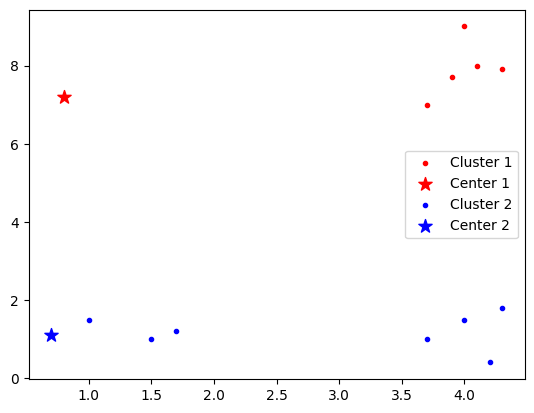


Iteration 2    : Centroid of Cluster 1 (3.47, 7.8)
                 Data in Cluster 1 (#5, #6, #7, #8, #9, #14)
Iteration 2    : Centroid of Cluster 2 (2.64, 1.19)
                 Data in Cluster 2 (#1, #2, #3, #4, #10, #11, #12, #13)


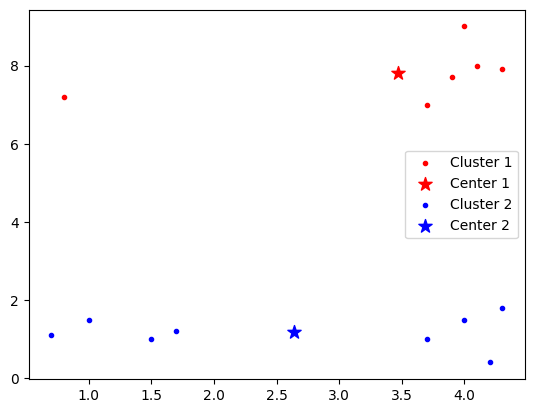


Iteration 3    : Centroid of Cluster 1 (3.47, 7.8)
                 Data in Cluster 1 (#5, #6, #7, #8, #9, #14)
Iteration 3    : Centroid of Cluster 2 (2.64, 1.19)
                 Data in Cluster 2 (#1, #2, #3, #4, #10, #11, #12, #13)


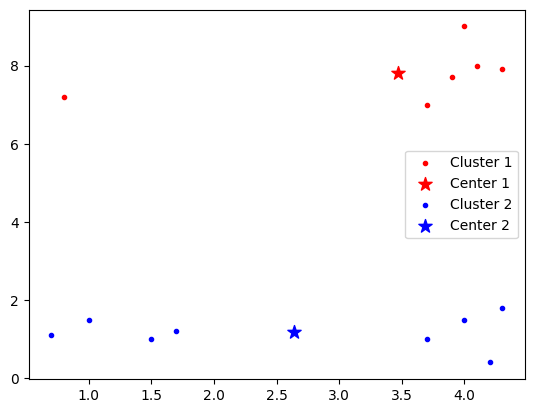

In [ ]:
initial_centers = np.array([[0.8, 7.2], [0.7, 1.1]])

centers, labels = kmeans(data, 3, initial_centers)



In [ ]:
# Scratch code result
print(labels)
print(centers)

[1 1 1 1 0 0 0 0 0 1 1 1 1 0]
[[3.46666667 7.8       ]
 [2.6375     1.1875    ]]


In [ ]:
result = KMeans(n_clusters=len(initial_centers), init=initial_centers, max_iter=3, n_init=1, random_state=0).fit(data)
print(result.labels_)
print(result.cluster_centers_)
print(result.inertia_)

[1 1 1 1 0 0 0 0 0 1 1 1 1 0]
[[3.46666667 7.8       ]
 [2.6375     1.1875    ]]
29.30083333333333


 k=3 with the initial cluster centres at (0.8, 7.2), (0.7, 1.1), and (4.3, 1.8)

Iteration 1    : Centroid of Cluster 1 (0.8, 7.2)
                 Data in Cluster 1 (#5, #6, #7, #8, #9, #14)
Iteration 1    : Centroid of Cluster 2 (0.7, 1.1)
                 Data in Cluster 2 (#1, #2, #3, #4)
Iteration 1    : Centroid of Cluster 3 (4.3, 1.8)
                 Data in Cluster 3 (#10, #11, #12, #13)


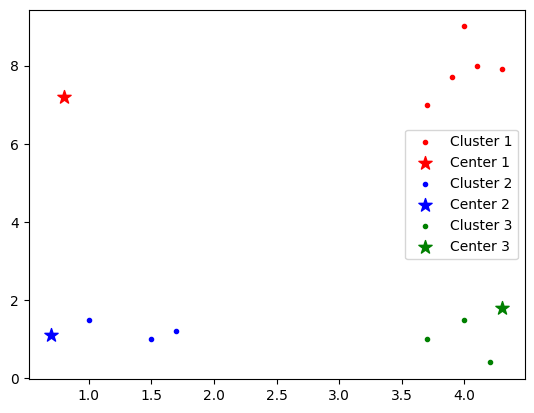


Iteration 2    : Centroid of Cluster 1 (3.47, 7.8)
                 Data in Cluster 1 (#5, #6, #7, #8, #9, #14)
Iteration 2    : Centroid of Cluster 2 (1.23, 1.2)
                 Data in Cluster 2 (#1, #2, #3, #4)
Iteration 2    : Centroid of Cluster 3 (4.05, 1.18)
                 Data in Cluster 3 (#10, #11, #12, #13)


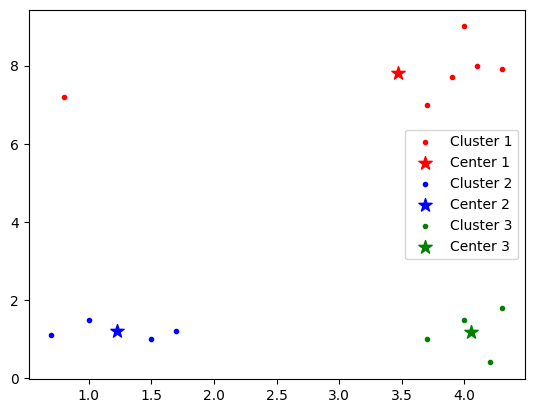


Iteration 3    : Centroid of Cluster 1 (3.47, 7.8)
                 Data in Cluster 1 (#5, #6, #7, #8, #9, #14)
Iteration 3    : Centroid of Cluster 2 (1.23, 1.2)
                 Data in Cluster 2 (#1, #2, #3, #4)
Iteration 3    : Centroid of Cluster 3 (4.05, 1.18)
                 Data in Cluster 3 (#10, #11, #12, #13)


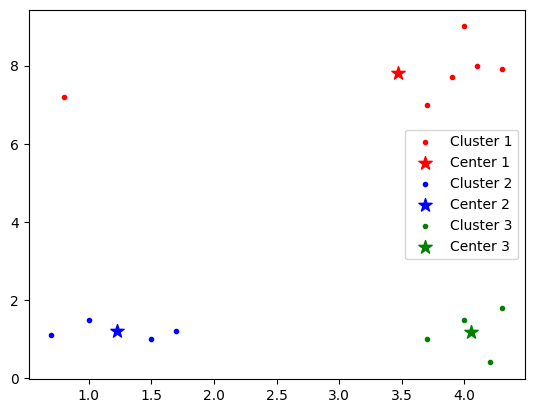

In [ ]:
initial_centers = np.array([[0.8, 7.2], [0.7, 1.1], [4.3, 1.8]])

centers, labels = kmeans(data, 3, initial_centers)


In [ ]:
# Scratch code result
print(labels)
print(centers)

[1 1 1 1 0 0 0 0 0 2 2 2 2 0]
[[3.46666667 7.8       ]
 [1.225      1.2       ]
 [4.05       1.175     ]]


In [ ]:
result = KMeans(n_clusters=len(initial_centers), init=initial_centers, max_iter=3, n_init=1, random_state=0).fit(data)
print(result.labels_)
print(result.cluster_centers_)
print(result.inertia_)

[1 1 1 1 0 0 0 0 0 2 2 2 2 0]
[[3.46666667 7.8       ]
 [1.225      1.2       ]
 [4.05       1.175     ]]
13.338333333333331


k=3 with the initial cluster centres being (4, 9), (0.7, 1.1) and (4.3, 1.8)

Iteration 1    : Centroid of Cluster 1 (4.0, 9.0)
                 Data in Cluster 1 (#5, #6, #7, #8, #9, #14)
Iteration 1    : Centroid of Cluster 2 (0.7, 1.1)
                 Data in Cluster 2 (#1, #2, #3, #4)
Iteration 1    : Centroid of Cluster 3 (4.3, 1.8)
                 Data in Cluster 3 (#10, #11, #12, #13)


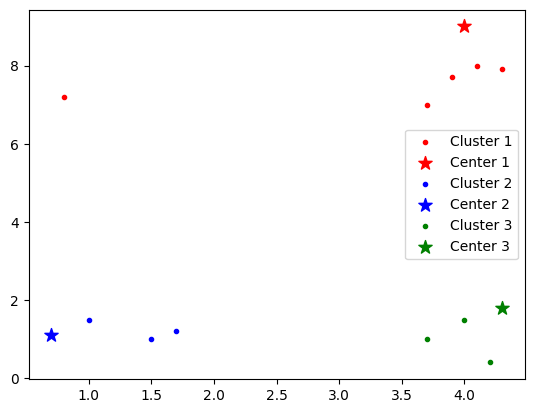


Iteration 2    : Centroid of Cluster 1 (3.47, 7.8)
                 Data in Cluster 1 (#5, #6, #7, #8, #9, #14)
Iteration 2    : Centroid of Cluster 2 (1.23, 1.2)
                 Data in Cluster 2 (#1, #2, #3, #4)
Iteration 2    : Centroid of Cluster 3 (4.05, 1.18)
                 Data in Cluster 3 (#10, #11, #12, #13)


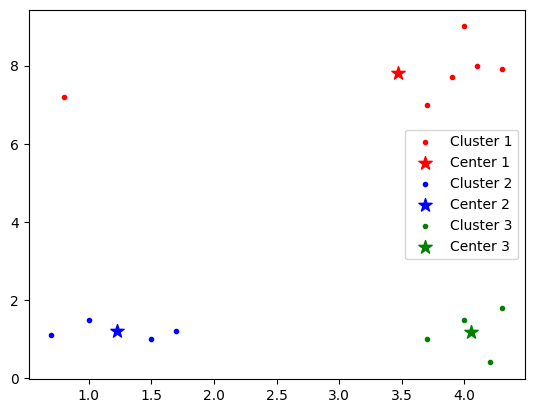


Iteration 3    : Centroid of Cluster 1 (3.47, 7.8)
                 Data in Cluster 1 (#5, #6, #7, #8, #9, #14)
Iteration 3    : Centroid of Cluster 2 (1.23, 1.2)
                 Data in Cluster 2 (#1, #2, #3, #4)
Iteration 3    : Centroid of Cluster 3 (4.05, 1.18)
                 Data in Cluster 3 (#10, #11, #12, #13)


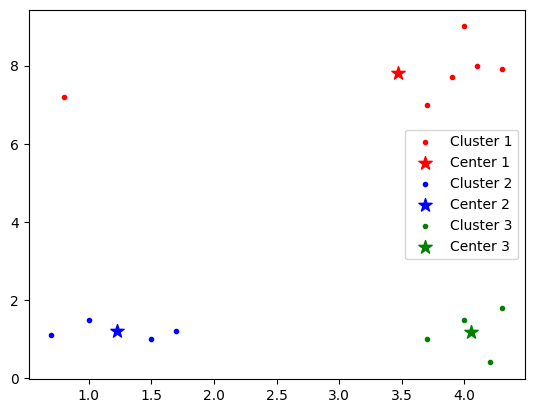

In [ ]:
initial_centers = np.array([[4, 9], [0.7, 1.1], [4.3, 1.8]])

centers, labels = kmeans(data, 3, initial_centers)


In [ ]:
# Scratch code result
print(labels)
print(centers)

[1 1 1 1 0 0 0 0 0 2 2 2 2 0]
[[3.46666667 7.8       ]
 [1.225      1.2       ]
 [4.05       1.175     ]]


In [ ]:
result = KMeans(n_clusters=len(initial_centers), init=initial_centers, max_iter=3, n_init=1, random_state=0).fit(data)
print(result.labels_)
print(result.cluster_centers_)
print(result.inertia_)

[1 1 1 1 0 0 0 0 0 2 2 2 2 0]
[[3.46666667 7.8       ]
 [1.225      1.2       ]
 [4.05       1.175     ]]
13.338333333333331
